In [43]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--master spark://iahlvldpt002.logistics.corp:7077 --packages com.datastax.spark:spark-cassandra-connector_2.12:3.0.0  pyspark-shell'

from pyspark import SparkContext
from pyspark.conf import SparkConf

from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.functions import desc, max,count, avg



spark = SparkSession.builder \
    .appName('SparkCassandraApp_GroupBy_test1') \
    .config('spark.cassandra.connection.host', 'iaheast-elassandra.logistics.corp') \
    .config('spark.cassandra.connection.port', '9042') \
    .config('spark.cassandra.auth.username','dev_mlaifm') \
    .config('spark.cassandra.auth.password','dev_mlaifm') \
    .config('spark.cassandra.output.consistency.level','ONE') \
    .config('spark.cassandra.connection.timeoutBeforeCloseMS','12000000') \
    .config('spark.cassandra.read.timeoutMS','12000000') \
    .config('spark.cassandra.connection.timeoutMS','12000000') \
    .config('spark.cores.max','5') \
    .config('spark.sql.catalog.myCatalog','com.datastax.spark.connector.datasource.CassandraCatalog') \
    .master('spark://iahlvldpt002.logistics.corp:7077') \
    .getOrCreate()


sqlContext = SQLContext(spark)
df = sqlContext \
  .read \
  .format('org.apache.spark.sql.cassandra') \
  .options(table='carrier_performance_155', keyspace='ml_ai_forecast_model') \
  .load()
#df.show(50000)

#df.groupBy('location_type').count().sort(desc("count")).show(1000)  


#df.filter(df.trip_id=='128843365').show()

#df.groupBy('trip_id').count().withColumnRenamed("count", "n").filter("n > 2").sort(desc("n")).show()
#.filter("'count' > 2").sort(desc("'count'"))
df.groupBy('trip_id').agg(count('*').alias("cnt"), max('route_start_date').alias("date")).withColumnRenamed("cnt", "n").filter("n > 2").sort(desc("n")).show()


  


+---------+---+-------------------+
|  trip_id|  n|               date|
+---------+---+-------------------+
|128843365| 10|2019-09-22 23:00:00|
|125667472| 10|2019-05-19 23:00:00|
|127472084|  9|2019-08-01 23:00:00|
|134106390|  9|2020-03-29 23:00:00|
|126415873|  9|2019-06-20 23:00:00|
|134708961|  9|2020-04-26 23:00:00|
|129204976|  9|2019-10-07 23:00:00|
|132472213|  9|2020-01-27 23:00:00|
|132805179|  9|2020-02-12 23:00:00|
|128899721|  9|2019-09-10 23:00:00|
|132803033|  8|2020-02-13 23:00:00|
|127181019|  8|2019-07-24 23:00:00|
|133659451|  8|2020-03-18 23:00:00|
|129673373|  8|2019-10-21 23:00:00|
|130915315|  8|2019-12-12 23:00:00|
|130909581|  8|2019-12-08 23:00:00|
|129663273|  8|2019-10-20 23:00:00|
|125621123|  8|2019-05-23 23:00:00|
|133298668|  8|2020-03-01 23:00:00|
|127427293|  8|2019-07-22 23:00:00|
+---------+---+-------------------+
only showing top 20 rows



<AxesSubplot:xlabel='partition_key'>

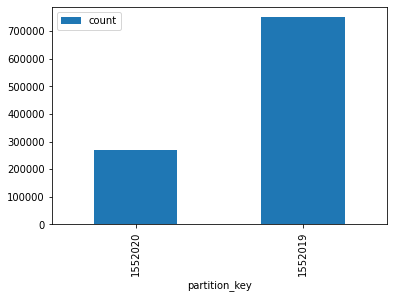

In [73]:
import matplotlib.pyplot as plt
#df.groupBy('partition_key').count().show() 
rpdf=df.groupBy('partition_key').count().toPandas()

rpdf.plot(x ='partition_key', y='count', kind = 'bar')

In [30]:
df.filter(df.trip_id=='128843365').sort(("stop_id")).show()

+-------------+----------------+-------------------+----------+--------------------+------------+-----------+----------+---------------+------------------+----------------+---------+--------+-------------+-------------+---------------+-----------+--------------------+------------+--------------+---------+--------------------+----------+------------+--------------------+---------+
|partition_key|business_unit_id|   route_start_date|      pkey|       business_unit|carrier_name|distance_mi|event_type|final_dlvy_city|final_dlvy_country|final_dlvy_state|lane_name|leg_type|location_type|ontime_status|     route_name|rtmgr1_name|sched_vs_actual_mins|   stop_city|  stop_country|  stop_id|           stop_name|stop_state|svc_provider|          trans_mode|  trip_id|
+-------------+----------------+-------------------+----------+--------------------+------------+-----------+----------+---------------+------------------+----------------+---------+--------+-------------+-------------+---------------

In [49]:
pdf=df.groupBy('location_type').count().sort(desc("count")).toPandas()
print(pdf)

               location_type   count
0                   Supplier  501102
1                      Plant  396779
2                  Crossdock   86908
3         Warehouse Facility   22377
4            Border Crossing    7552
5   Deconsolidation Facility    1416
6                       Yard    1185
7                      Other    1151
8            Transfer Center     806
9                 Sub-Consol     789
10                 Rail Yard     404
11                   Airport     174
12                  Customer     160
13                      Port      42
14              Dealer/Store      15
15             Road Terminal       7
16           Remote Domicile       2
17                   Station       1
18          Personal Address       1
19              Sub-Assembly       1
20                     Depot       1


<AxesSubplot:xlabel='location_type'>

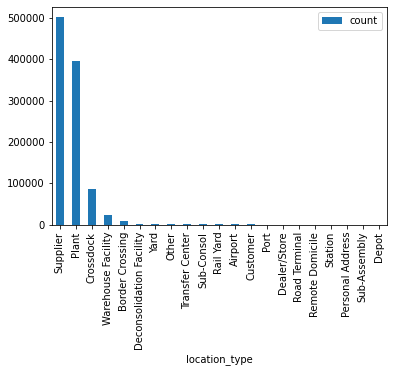

In [53]:
import matplotlib.pyplot as plt
pdf.plot(x ='location_type', y='count', kind = 'bar')

+---------+---------+
|  trip_id|trip_mile|
+---------+---------+
|132471971|   4512.0|
|127932698|   4512.0|
|129797032|   4512.0|
|133299510|   4512.0|
|131984893|   4512.0|
|128838986|   4512.0|
|131976963|   4512.0|
|129016979|   4512.0|
|127988662|   4512.0|
|129799310|   4512.0|
|132316702|   4512.0|
|132641007|   4512.0|
|129673785|   4512.0|
|129419027|   4512.0|
|128172639|   4512.0|
|130913849|   4512.0|
|129426988|   4512.0|
|130316354|   4512.0|
|130143415|   4512.0|
|133033623|   4512.0|
|130802605|   4512.0|
|129016981|   4512.0|
|129419028|   4512.0|
|127932664|   4512.0|
|130132880|   4512.0|
|129681580|   4512.0|
|128838987|   4512.0|
|130802619|   4512.0|
|132796801|   4512.0|
|133042207|   4512.0|
|128681962|   4512.0|
|133139831|   4512.0|
|129027873|   4512.0|
|129213922|   4512.0|
|129959219|   4512.0|
|131603013|   4512.0|
|128693195|   4512.0|
|133307728|   4512.0|
|130802606|   4512.0|
|132308564|   4512.0|
|127999609|   4512.0|
|129797033|   4512.0|
|129213923

array([[<AxesSubplot:title={'center':'trip_mile'}>]], dtype=object)

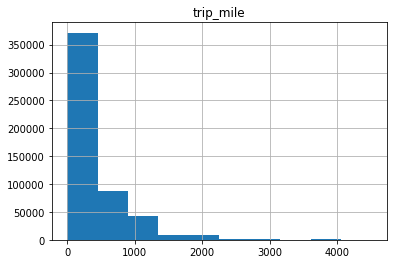

In [58]:
from pyspark.sql.functions import desc, max,count, avg
df.groupBy('trip_id').agg(avg('distance_mi').alias("trip_mile")).sort(desc("trip_mile")).show(1000)


array([[<AxesSubplot:title={'center':'trip_mile'}>]], dtype=object)

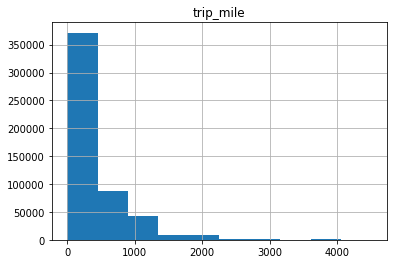

In [59]:
ptdf=df.groupBy('trip_id').agg(avg('distance_mi').alias("trip_mile")).sort(desc("trip_mile")).toPandas()
ptdf.hist('trip_mile')

In [60]:
posdf=df.groupBy('ontime_status').count().sort(desc("count")).toPandas()
print(posdf)

  ontime_status   count
0       On Time  527831
1         Ahead  375520
2          Late  111997
3           N/A    5525


<AxesSubplot:title={'center':'ontime_status'}, ylabel='count'>

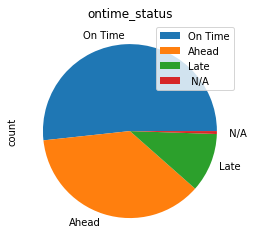

In [68]:
#posdf=df.groupBy('ontime_status').count().sort(desc("count")).toPandas()
posdf.plot.pie(title="ontime_status",labels=posdf.ontime_status,y='count')
